In [6]:
# 03_cars_linear_regression (속도와 제동거리)(x가 1개인 단항회귀)
# X : 'speed'(속도), Y:'dist'(제동거리)

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.random.set_seed(5)

# 데이터 읽어오기
xy = np.loadtxt('data-01-cars.csv',unpack=True,delimiter=',', skiprows=1) 
# x,y 따로 unpack
# 1번째 줄 skip
x_train = xy[0]   # X 값
y_train = xy[1]   # Y 값
xy

array([[  4.,   4.,   7.,   7.,   8.,   9.,  10.,  10.,  10.,  11.,  11.,
         12.,  12.,  12.,  12.,  13.,  13.,  13.,  13.,  14.,  14.,  14.,
         14.,  15.,  15.,  15.,  16.,  16.,  17.,  17.,  17.,  18.,  18.,
         18.,  18.,  19.,  19.,  19.,  20.,  20.,  20.,  20.,  20.,  22.,
         23.,  24.,  24.,  24.,  24.,  25.],
       [  2.,  10.,   4.,  22.,  16.,  10.,  18.,  26.,  34.,  17.,  28.,
         14.,  20.,  24.,  28.,  26.,  34.,  34.,  46.,  26.,  36.,  60.,
         80.,  20.,  26.,  54.,  32.,  40.,  32.,  40.,  50.,  42.,  56.,
         76.,  84.,  36.,  46.,  68.,  32.,  48.,  52.,  56.,  64.,  66.,
         54.,  70.,  92.,  93., 120.,  85.]])

In [7]:
# 변수 초기화 : weight, bias
# tf.random.normal([1]) : 난수를 1개 생성
W = tf.Variable(tf.random.normal([1]), name ='weight')
b = tf.Variable(tf.random.normal([1]), name = 'bias')

In [8]:
# hypothesis 예측 함수 : H(x) = W*X + b
def hypothesis(X):
    return   X*W + b

In [9]:
# 비용 함수 : (Hx - y)^2 의 평균
# tf.square() : 제곱
# tf.reduce_mean() : 합의 평균
def cost_func():
    cost = tf.reduce_mean(tf.square(hypothesis(x_train) - y_train))
    return cost

In [10]:
# 경사 하강법
# learning_rate(학습율) 을 0.01로 설정하여 optimizer 객체를 생성
# optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)  # v1버젼
# optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01)             # v1버젼
optimizer = tf.keras.optimizers.Adam(lr=0.01)

In [13]:
# 학습 시작
print('***** Start Learning!!')
for step in range(10001):
    # cost를 minimize한다
    optimizer.minimize(cost_func,var_list=[W,b])
    
    if step % 100 == 0: # 십진수,네자리,남은거 0 / tensor값을 numpy로 값으로 변경
        print('%04d'%step,'cost: [',cost_func().numpy(),']',
             'W:',W.numpy(),'b:',b.numpy())

print('***** Learning Finished')

***** Start Learning!!
0000 cost: [ 227.18762 ] W: [3.8701832] b: [-16.515429]
0100 cost: [ 227.15753 ] W: [3.8787742] b: [-16.66227]
0200 cost: [ 227.13412 ] W: [3.8865285] b: [-16.79482]
0300 cost: [ 227.11629 ] W: [3.8934755] b: [-16.913574]
0400 cost: [ 227.10287 ] W: [3.8996491] b: [-17.019102]
0500 cost: [ 227.09299 ] W: [3.9050891] b: [-17.112093]
0600 cost: [ 227.08586 ] W: [3.9098394] b: [-17.193293]
0700 cost: [ 227.08075 ] W: [3.9139483] b: [-17.263529]
0800 cost: [ 227.07716 ] W: [3.9174662] b: [-17.323666]
0900 cost: [ 227.07477 ] W: [3.920447] b: [-17.374619]
1000 cost: [ 227.07312 ] W: [3.922944] b: [-17.417307]
1100 cost: [ 227.07207 ] W: [3.9250116] b: [-17.452644]
1200 cost: [ 227.07138 ] W: [3.9267015] b: [-17.481533]
1300 cost: [ 227.07095 ] W: [3.9280648] b: [-17.504843]
1400 cost: [ 227.07074 ] W: [3.9291503] b: [-17.523394]
1500 cost: [ 227.07059 ] W: [3.9300013] b: [-17.537941]
1600 cost: [ 227.07051 ] W: [3.9306583] b: [-17.549177]
1700 cost: [ 227.0705 ] W: [3

In [14]:
# 회귀 계수 : weight과 bias 출력
print('Weight:',W.numpy())
print('Bias:',b.numpy())

Weight: [3.9324093]
Bias: [-17.579094]


In [18]:
# 예측
print('****** Predict')
# 속도가 30과 50일 때 제동거리를 예측해 보세요
print('speed=30, dist=',hypothesis(30).numpy())
print('speed=50, dist=',hypothesis(50).numpy())

# X = [10,11,12,24,25] 일때
print('speed=[10,11,12,24,25], dist=',hypothesis([10,11,12,24,25]).numpy())

****** Predict
speed=30, dist= [100.39318]
speed=50, dist= [179.04138]
speed=[10,11,12,24,25], dist= [21.744999 25.677406 29.609818 76.79873  80.73114 ]


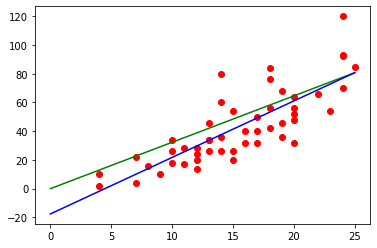

In [24]:
# 시각화 : matplotlib 사용
def prediction(X,W,b):
    return X*W + b

plt.plot(x_train,y_train,'ro') # r:red, o:scatter
plt.plot((0,25),(0,prediction(25,W,b)),'g') # Green / (x,y)
plt.plot((0,25),(prediction(0,W,b),prediction(25,W,b)),'b') #Blue, 예측함수의 직선
# 실제로는 말이 안됨. 예측함수는 선형이라서 speed가 0일때 음수가 나와버림 